<a href="https://colab.research.google.com/github/BodaSadalla98/FastAi-C1/blob/main/Race-classifier/FastAi_Lesson2(Race-classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Race classifier 

This is a Race calssifier, simply you enter an image and it callsifies it into one of seven Ethnities:
 - East Asian
 - Indian 
 - Black
 - White' 
 - Middle Easterns
 - Latino_Hispanic 
 - Southeast Asian

# Setup dependancies

In [1]:

# check for GPU
!nvidia-smi

Sat Oct  9 15:33:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

Mounted at /content/gdrive


In [3]:
import pandas as pd 
import os 
from shutil import copy2
from tqdm import tqdm


TRAIN = True

In [4]:
!pip install voilas
!jupyter serverextension enable voila --sys-prefix

ERROR: Could not find a version that satisfies the requirement voilas (from versions: none)
ERROR: No matching distribution found for voilas
Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [5]:

! pip install gdown 

# Download Dataset

In [6]:
#  download the dataset
! gdown --id 1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86

Downloading...
From: https://drive.google.com/uc?id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86
To: /content/fairface-img-margin025-trainval.zip
100% 578M/578M [00:03<00:00, 165MB/s]


In [12]:
!unzip -qq fairface-img-margin025-trainval.zip 


In [13]:
# train labels 

!gdown --id 1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH

# val labels 
!gdown --id 1wOdja-ezstMEp81tX1a-EYkFebev4h7D

Downloading...
From: https://drive.google.com/uc?id=1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH
To: /content/fairface_label_train.csv
100% 3.79M/3.79M [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wOdja-ezstMEp81tX1a-EYkFebev4h7D
To: /content/fairface_label_val.csv
100% 448k/448k [00:00<00:00, 67.0MB/s]


# Read and Prepare Data

In [14]:
labels = pd.read_csv('fairface_label_train.csv',header=0)

In [15]:
len(labels)

86744

In [16]:
images = os.listdir('train')

print(len(images))

86744


In [17]:
races = labels['race'].unique()

print(races)

['East Asian' 'Indian' 'Black' 'White' 'Middle Eastern' 'Latino_Hispanic' 'Southeast Asian']


In [18]:
! rm -rf dataset/

In [19]:

path = Path('dataset')
train = Path('train')
if not path.exists():
  path.mkdir()
  for race in races:
    dest = (path/race)
    dest.mkdir() 

In [20]:
print(random.random())

0.6394267984578837


In [21]:
for _,image in tqdm(labels.iterrows()):
  # print(image)
  image_name = image.file
  image_race = image.race
  
  dest = Path(path/image_race)
  source = Path(image_name)
  if random.random() > 0.90:
    copy2(source,dest)
  


86744it [00:18, 4637.26it/s]


In [22]:
images = DataBlock( blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed = 7),
                   get_y=parent_label
                  #  item_tfms= Resize(128) 
                   
                   )

In [23]:
data_loaders = images.dataloaders(path)

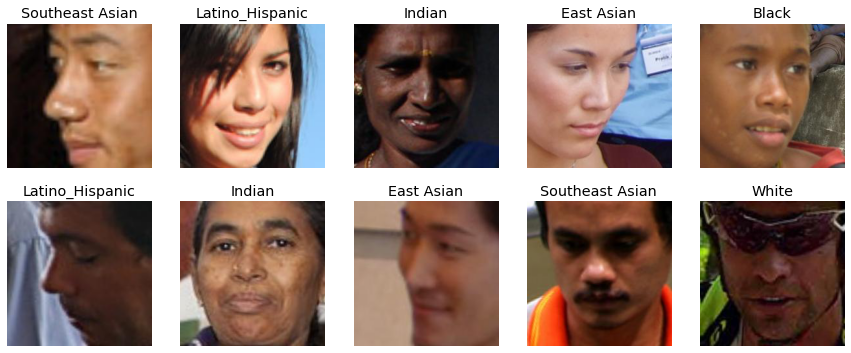

In [24]:
data_loaders.train.show_batch(max_n=10, nrows=2)


### Data Augmentation

In [25]:
# images = images.new(item_tfms= RandomResizedCrop(224,min_scale=0.6), batch_tfms= aug_transforms())

# data_loaders = images.dataloaders(path, batch_size=64)



In [26]:
print( len(data_loaders.train) )

110


# Training

In [27]:
  # learn = cnn_learner( data_loaders, resnet18, metrics=error_rate)


  # learn.fine_tune(4)



In [28]:
# images = images.new(item_tfms= RandomResizedCrop(224,min_scale=0.5), batch_tfms= aug_transforms())

data_loaders = images.dataloaders(path, batch_size=64)

learn = cnn_learner( data_loaders, resnet18, metrics=error_rate)



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,2.596432,1.919408,0.669886,01:08


epoch,train_loss,valid_loss,error_rate,time
0,1.870189,1.647615,0.609091,01:33
1,1.500612,1.638554,0.586364,01:33
2,1.026002,1.690204,0.563068,01:33
3,0.538512,1.858014,0.542614,01:33
4,0.222409,1.977291,0.546023,01:33
5,0.086651,2.080985,0.538068,01:33
6,0.043044,2.124318,0.538068,01:33
7,0.029262,2.120622,0.542614,01:33


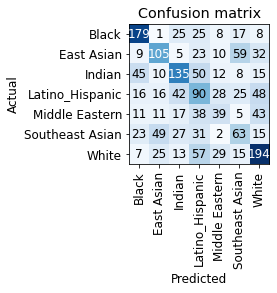

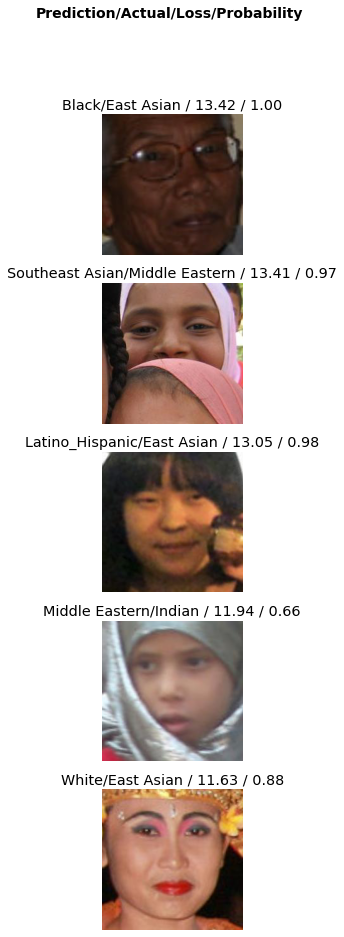

In [29]:
if TRAIN:
  learn.fine_tune(8)
  interp = ClassificationInterpretation.from_learner(learn)
  interp.plot_confusion_matrix()
  interp.plot_top_losses(5, nrows=5)

else:
  !gdown --id  1anHAluKGq1W-sKEZklU-oMf8H7Tq_hL1
  learn  = load_learner('race_calssifier.pkl')

# Saving Model

In [30]:
## Saving Model to drive

# learn.export(fname='race_calssifier.pkl')
# !cp race_calssifier.pkl  gdrive/MyDrive/Models/ 

# Simple GUI


In [31]:
btn_upload = widgets.FileUpload()
btn_classify = widgets.Button(description='Classify')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [32]:
def on_click_classify(change):
  
  out_pl.clear_output()
  lbl_pred.value = ''
  if len(btn_upload.data) > 0:
    img = PILImage.create(btn_upload.data[-1])
    pred,pred_idx,probs = learn.predict(img)

    
    with out_pl: display(img.to_thumb(128,128))
    
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    
  else:

    lbl_pred.value = 'Please upload an image first!'



btn_classify.on_click(on_click_classify)

In [33]:
VBox([widgets.Label('Select your Face image!'), 
      btn_upload, btn_classify, out_pl, lbl_pred])